# Analyze geolocation

In [179]:
import os
import math

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

dir_in = './data_ori/'

In [86]:
events = pd.read_csv(dir_in + 'events.csv')
def age_group(sex, age):
    # Convert age column to age group
    #ageGroupsF = ['23-','24-26','27-28','29-32','33-42,''43+']
    #ageGroupsM = ['22-','23-26','27-28','29-31','32-38,''39+']

    if sex not in ['M','F']:
        ValueError('%s is not a valid gender' % sex)
        
    if age not in range(100):
        ValueError('%s is not a valid age' % age)
    
    if sex=="M":
        if age<=22:
            g = 0
        elif age<=26:
            g = 1
        elif age<=28:
            g = 2
        elif age<=31:
            g = 3
        elif age<=38:
            g = 4
        else:
            g = 5
    elif sex=="F":
        if age<=23:
            g = 0
        elif age<=26:
            g = 1
        elif age<=28:
            g = 2
        elif age<=32:
            g = 3
        elif age<=42:
            g = 4
        else:
            g = 5
    
    return g
# From http://www.tageo.com/index-e-ch-cities-CN.htm
gps_cities = {}
gps_cities['beijing'] = (39.93, 116.4) #
gps_cities['wuhan'] = (30.58, 114.27) #
gps_cities['chengdu'] = (30.670, 104.07)#
gps_cities['tianjin'] = (39.130, 117.20)#
gps_cities['shenyang'] = (41.800, 123.450)#
gps_cities['xian'] = (34.270, 108.900) #
gps_cities['guangzhou'] = (23.120, 113.250) # Canton
gps_cities['harbin'] = (45.750, 126.650)
gps_cities['chongqing'] = (29.57, 106.58) #
gps_cities['hongkong'] = (22.20, 114.10) #
gps_cities['nanjing'] = (32.050, 118.78)
gps_cities['shanghai'] = (31.230, 121.470) #

In [89]:
train_0 = events[(events.longitude>0) & (events.latitude>0)].groupby('device_id').first()
train_0.head()

,event_id,timestamp,longitude,latitude
device_id,,,,
-9222956879900151005,12679,2016-05-07 12:18:35,113.24,23.19
-9221825537663503111,74539,2016-05-07 07:52:34,113.36,33.63
-9221026417907250887,6402,2016-05-02 07:56:49,114.36,30.87
-9220452176650064280,105475,2016-05-06 08:19:24,1.00,1.00
-9220061629197656378,279922,2016-05-05 13:08:11,124.90,46.60


In [122]:
distance_for_close = 1.1

for k in gps_cities.keys():
    v = gps_cities[k]
    train_0['dist_' + k] = train_0[['longitude','latitude']].apply(lambda x: math.sqrt( (x[0]-v[1])**2 + (x[1]-v[0])**2 ), axis=1)
    train_0['close_to_' + k] = train_0['dist_' + k] < distance_for_close

train_0.head()

,event_id,timestamp,longitude,latitude,dist_beijing,close_to_beijing,dist_guangzhou,close_to_guangzhou,dist_chengdu,close_to_chengdu,...,dist_nanjing,close_to_nanjing,dist_wuhan,close_to_wuhan,dist_shanghai,close_to_shanghai,dist_harbin,close_to_harbin,dist_chongqing,close_to_chongqing
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,12679,2016-05-07 12:18:35,113.24,23.19,17.035645,False,0.070711,True,11.833820,False,...,10.449459,False,7.461434,False,11.505412,False,26.244651,False,9.222798,False
-9221825537663503111,74539,2016-05-07 07:52:34,113.36,33.63,6.995113,False,10.510576,False,9.750164,False,...,5.645600,False,3.182860,False,8.457665,False,17.986620,False,7.902658,False
-9221026417907250887,6402,2016-05-02 07:56:49,114.36,30.87,9.286829,False,7.829087,False,10.291943,False,...,4.574801,False,0.303645,True,7.119108,False,19.299184,False,7.887864,False
-9220452176650064280,105475,2016-05-06 08:19:24,1.00,1.00,121.789593,False,114.408727,False,107.255460,False,...,121.804068,False,117.068652,False,124.204967,False,133.380977,False,109.377243,False
-9220061629197656378,279922,2016-05-05 13:08:11,124.90,46.60,10.804578,False,26.211312,False,26.223154,False,...,15.784705,False,19.225954,False,15.748073,False,1.945508,False,25.012863,False


In [123]:
dist_cols = ['dist_' + k for k in gps_cities.keys()]
close_to_cols = ['close_to_' + k for k in gps_cities.keys()]
print close_to_cols

['close_to_beijing', 'close_to_guangzhou', 'close_to_chengdu', 'close_to_tianjin', 'close_to_hongkong', 'close_to_shenyang', 'close_to_xian', 'close_to_nanjing', 'close_to_wuhan', 'close_to_shanghai', 'close_to_harbin', 'close_to_chongqing']


### Validation

In [124]:
# How many devices:
train_0.shape

(30674, 28)

In [131]:
# Check whether devices are close to multiple cities
# For distance_for_close = 1.0: 1788 devices double, 11654 are close to cities
# For distance_for_close = 1.1: 2634 devices double, 12039 are close to cities <- most reasonable
# For distance_for_close = 1.3: 4569 devices double, 12832 are close to cities
# For distance_for_close = 1.5: 5250 devices double, 13788 are close to cities
# For distance_for_close = 2.0: 6725 devices double, 15892 are close to cities
print('Number of devices close to more than one city')
sum(train_0[close_to_cols].sum(axis=1)>1)

Number of devices close to more than one city


2634

In [132]:
# Check how many devices are close to cities
print('Number of devices close to cities')
sum(train_0[close_to_cols].sum(axis=1)>0)

Number of devices close to cities


12039

In [130]:
# Merge with train data
df_train = pd.read_csv(dir_in + 'gender_age_train.csv')
df_train['age_group'] = df_train[['gender','age']].apply(lambda x: age_group(x[0],x[1]), axis=1)

df_plot = pd.merge(df_train, train_0, left_on="device_id", right_index=True, how="inner")
print('Number of devices in train')
df_plot.shape

Number of devices in train


(11949, 33)

### Validate close to per gender

In [133]:
print('Gender count:')
g = df_plot.groupby('gender').size()
g

Gender count:


gender
F    3498
M    8451
dtype: int64

In [134]:
cnt = df_plot.groupby('gender')[close_to_cols].sum()
cnt.loc['F'] /= g[0]
cnt.loc['M'] /= g[1]
cnt

,close_to_beijing,close_to_guangzhou,close_to_chengdu,close_to_tianjin,close_to_hongkong,close_to_shenyang,close_to_xian,close_to_nanjing,close_to_wuhan,close_to_shanghai,close_to_harbin,close_to_chongqing
gender,,,,,,,,,,,,
F,0.072041,0.078902,0.041452,0.040309,0.056604,0.019726,0.016867,0.024871,0.027730,0.053173,0.007719,0.024014
M,0.056443,0.109809,0.048042,0.035854,0.080346,0.013608,0.017394,0.025796,0.026742,0.062596,0.004970,0.016093


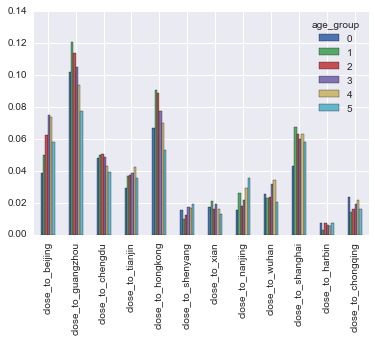

In [162]:
cnt.T.plot(kind='bar')

### Validate close to per age group

In [163]:
print('Age group count:')
a = df_plot.groupby('age_group').size()
a

Age group count:


age_group
0    1531
1    2065
2    1407
3    2005
4    2680
5    2261
dtype: int64

In [164]:
cnt = df_plot.groupby('age_group')[close_to_cols].sum()
for i in range(6):
    cnt.loc[i] /= a[i]
cnt

,close_to_beijing,close_to_guangzhou,close_to_chengdu,close_to_tianjin,close_to_hongkong,close_to_shenyang,close_to_xian,close_to_nanjing,close_to_wuhan,close_to_shanghai,close_to_harbin,close_to_chongqing
age_group,,,,,,,,,,,,
0,0.038537,0.101894,0.048334,0.029393,0.066623,0.015676,0.017636,0.015676,0.025474,0.043109,0.007185,0.023514
1,0.049879,0.121065,0.049879,0.036804,0.090557,0.009685,0.021308,0.026150,0.023245,0.067312,0.002906,0.014044
2,0.062544,0.113717,0.050462,0.037669,0.088842,0.012082,0.016347,0.017768,0.023454,0.063255,0.007107,0.016347
3,0.074813,0.105237,0.048878,0.038404,0.077805,0.017456,0.019451,0.021446,0.031920,0.059850,0.005985,0.018953
4,0.073507,0.094030,0.043284,0.042164,0.069776,0.016791,0.016418,0.029104,0.034328,0.063433,0.005224,0.021642
5,0.058381,0.077399,0.039363,0.035383,0.053074,0.019018,0.012826,0.035825,0.020787,0.057939,0.007077,0.015922


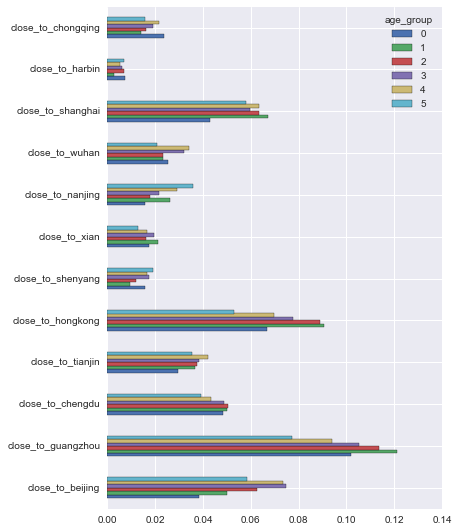

In [165]:
cnt.T.plot(kind='barh', figsize=(6,9))

### Validate distance to per age group

In [166]:
cnt = df_plot.groupby('age_group')[dist_cols].mean()
cnt

,dist_beijing,dist_guangzhou,dist_chengdu,dist_tianjin,dist_hongkong,dist_shenyang,dist_xian,dist_nanjing,dist_wuhan,dist_shanghai,dist_harbin,dist_chongqing
age_group,,,,,,,,,,,,
0,14.192881,13.231120,14.837340,13.818894,13.876534,18.276741,12.647405,11.764216,10.800578,13.192729,22.878857,13.310441
1,14.530835,13.381495,15.464442,14.129778,13.971864,18.659421,13.165388,11.861551,11.109085,13.203679,23.344065,13.896470
2,13.385717,12.991949,15.149081,12.969010,13.567277,17.312471,12.638519,10.962845,10.474208,12.225627,21.974538,13.535830
3,14.207629,14.228057,15.811273,13.844360,14.836823,18.265624,13.382747,12.128476,11.538615,13.467795,22.916958,14.308769
4,14.790869,14.853736,16.580027,14.423701,15.455946,18.727811,14.037109,12.581100,12.041808,13.883046,23.292161,15.016364
5,17.466587,18.376174,19.521969,17.113506,18.996034,21.345216,16.979630,15.566091,15.247850,16.922996,25.873570,18.112999


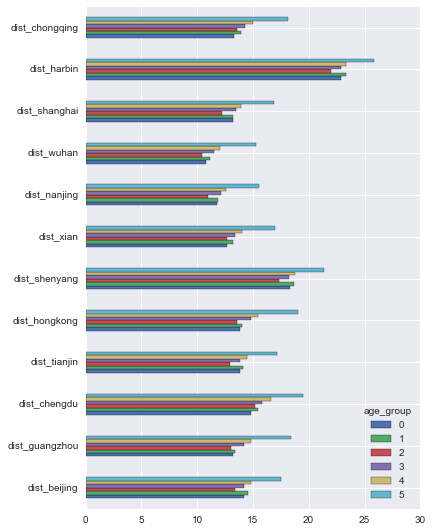

In [167]:
cnt.T.plot(kind='barh', figsize=(6,9))

In [175]:
# So women are in general further away from cities (are more spread out)
cnt = df_plot.groupby('age_group')[dist_cols].std()
cnt

,dist_beijing,dist_guangzhou,dist_chengdu,dist_tianjin,dist_hongkong,dist_shenyang,dist_xian,dist_nanjing,dist_wuhan,dist_shanghai,dist_harbin,dist_chongqing
age_group,,,,,,,,,,,,
0,18.934884,18.150146,16.484158,19.077820,18.194732,19.749189,17.370369,19.177372,18.375262,19.478835,19.865251,16.946776
1,20.522546,19.538647,17.677659,20.668833,19.601333,21.269714,18.789306,20.776952,19.854461,21.108574,21.313481,18.191687
2,18.261751,17.335048,15.605584,18.386224,17.404027,19.024260,16.491516,18.341894,17.458520,18.686656,19.101286,16.046892
3,20.997615,19.727021,17.970036,21.133436,19.779080,21.802484,19.087316,21.104014,20.154515,21.441067,21.857148,18.493339
4,22.346357,21.059972,19.123722,22.495199,21.105870,23.190808,20.422695,22.593894,21.631755,22.938153,23.281897,19.756952
5,28.602235,26.544243,24.224260,28.820225,26.574702,29.677022,26.145107,29.013670,27.717753,29.383746,29.729500,25.088311


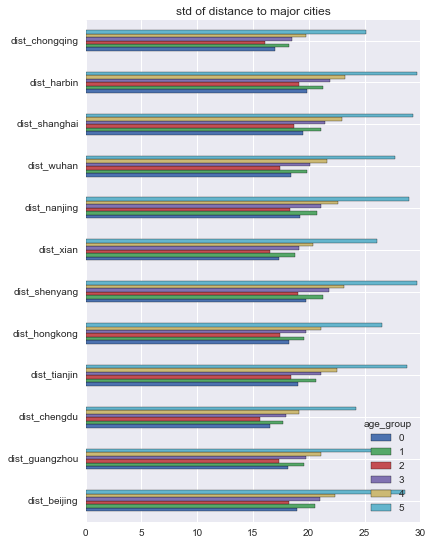

In [176]:
cnt.T.plot(kind='barh', figsize=(6,9))
plt.title('std of distance to major cities')

### Validate distance to per gender

In [168]:
cnt = df_plot.groupby('gender')[dist_cols].mean()
cnt

,dist_beijing,dist_guangzhou,dist_chengdu,dist_tianjin,dist_hongkong,dist_shenyang,dist_xian,dist_nanjing,dist_wuhan,dist_shanghai,dist_harbin,dist_chongqing
gender,,,,,,,,,,,,
F,14.491688,15.633744,16.761039,14.15616,16.277527,18.469892,14.056617,12.840139,12.373107,14.239723,23.013119,15.282383
M,15.086384,14.361172,16.283271,14.69305,14.952910,19.091114,13.963419,12.571874,11.929285,13.883204,23.727718,14.737672


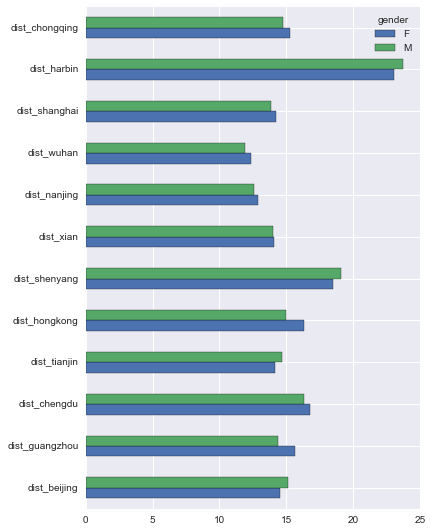

In [169]:
cnt.T.plot(kind='barh', figsize=(6,9))

In [177]:
cnt = df_plot.groupby('gender')[dist_cols].std()
cnt

,dist_beijing,dist_guangzhou,dist_chengdu,dist_tianjin,dist_hongkong,dist_shenyang,dist_xian,dist_nanjing,dist_wuhan,dist_shanghai,dist_harbin,dist_chongqing
gender,,,,,,,,,,,,
F,22.952082,21.356225,19.556919,23.102008,21.383221,23.825943,20.922475,23.084733,22.094096,23.398817,23.924684,20.190727
M,22.118674,20.976286,18.994647,22.281942,21.032029,22.963189,20.240873,22.431494,21.446282,22.780179,23.015091,19.594707


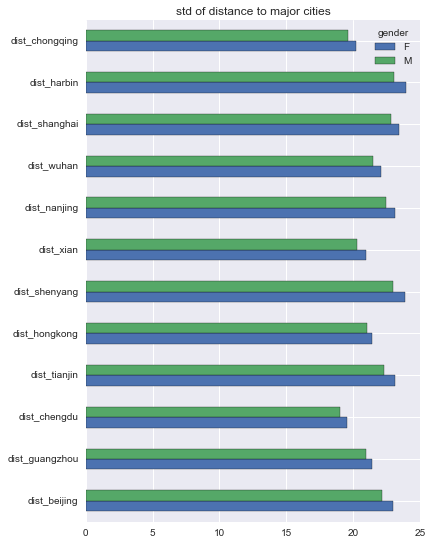

In [178]:
cnt.T.plot(kind='barh', figsize=(6,9))
plt.title('std of distance to major cities')